In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

import pymc

In [4]:
import pytensor.tensor as pt
import os
os.chdir("c:/users/jako/ml_playground")

In [5]:
from scipy.io import arff

In [11]:
df = arff.loadarff("employee-information.arff")
df = pd.DataFrame(df[0])

In [12]:
df.head()

,ID,Gender,Age,EducationBackground,Language,marriage,PartnerWorking,Numberofchildren,AvgAgeoftheirchildren,Resident,...,Transportation,Vacationdays,Nationality,Employmenttype,No.ofactivities,No.ofpenalties,TermReason,Riseinincomereceived,Employeedisciplined,Recommendationforpromotion
0,5.0,b'm',b'34-41',b'master',b'2',b'married',b'yes',0.0,0.0,b'local',...,b'yes',4.0,b'iraqi',b'permanent',68.0,0.0,b'none',b'yes',b'no',b'yes'
1,266.0,b'f',b'50yearsabove',b'bachelor',b'2',b'married',b'no',4.0,18.0,b'local',...,b'yes',4.0,b'iraqi',b'permanent',3.0,0.0,b'none',b'yes',b'yes',b'yes'
2,103.0,b'm',b'50yearsabove',b'diploma',b'3',b'married',b'no',2.0,20.0,b'local',...,b'no',4.0,b'iraqi',b'permanent',2.0,0.0,b'none',b'yes',b'yes',b'yes'
3,15.0,b'm',b'26-33',b'bachelor',b'1',b'married',b'no',2.0,2.0,b'local',...,b'yes',4.0,b'iraqi',b'permanent',68.0,0.0,b'none',b'yes',b'no',b'yes'
4,282.0,b'm',b'42-49',b'bachelor',b'3',b'married',b'yes',3.0,19.0,b'local',...,b'yes',2.0,b'iraqi',b'fixedtermcontract',2.0,0.0,b'none',b'yes',b'yes',b'yes'


In [29]:
for col in df.select_dtypes(object):
    df[col] = df[col].apply(lambda x: x.decode('utf-8').strip("'"))

In [34]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1000 non-null   float64
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   object 
 3   EducationBackground         1000 non-null   object 
 4   Language                    1000 non-null   object 
 5   marriage                    1000 non-null   object 
 6   PartnerWorking              1000 non-null   object 
 7   Numberofchildren            1000 non-null   float64
 8   AvgAgeoftheirchildren       1000 non-null   float64
 9   Resident                    1000 non-null   object 
 10  Jobtime                     1000 non-null   object 
 11  Hoursofwork                 1000 non-null   float64
 12  Salary                      1000 non-null   float64
 13  Yearsofservice              1000 n

In [39]:
df.select_dtypes([float, int]).describe()

,ID,Numberofchildren,AvgAgeoftheirchildren,Hoursofwork,Salary,Vacationdays,No.ofactivities,No.ofpenalties
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,179.462849,1.795640,3132.625856,8.371583,1.587077e+05,3.338871,1166.793497,0.179612
std,88.819201,1.722334,39817.414490,0.634053,3.332866e+05,0.961456,25022.605180,0.767276
min,1.000000,0.000000,0.000000,6.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,109.902187,0.000000,0.000000,8.000000,2.000000e+00,2.494027,0.000000,0.000000
50%,184.806284,1.447016,5.000000,8.000000,2.000000e+00,4.000000,3.000000,0.000000
75%,243.000000,3.032000,18.000000,9.000000,3.000000e+00,4.000000,6.000000,0.000000
max,362.000000,6.000000,631782.454921,11.000000,1.439919e+06,4.000000,641000.000000,6.000000


In [41]:
df.select_dtypes(object)

,Gender,Age,EducationBackground,Language,marriage,PartnerWorking,Resident,Jobtime,Yearsofservice,Socialassurance,Position,Department,Computerskills,Jobsecurity,Smoking,Transportation,Nationality,Employmenttype,TermReason,Riseinincomereceived,Employeedisciplined,Recommendationforpromotion
0,m,34-41,master,2,married,yes,local,ft,1,yes,leademp,others,good,good,no,yes,iraqi,permanent,none,yes,no,yes
1,f,50yearsabove,bachelor,2,married,no,local,ft,1,no,regularemp,marketing,good,excellent,no,yes,iraqi,permanent,none,yes,yes,yes
2,m,50yearsabove,diploma,3,married,no,local,ft,2,no,supervisor,inventory,good,excellent,no,no,iraqi,permanent,none,yes,yes,yes
3,m,26-33,bachelor,1,married,no,local,ft,3,no,supervisor,sales,good,good,yes,yes,iraqi,permanent,none,yes,no,yes
4,m,42-49,bachelor,3,married,yes,local,ft,2,yes,leademp,IT,none,good,no,yes,iraqi,fixedtermcontract,none,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,m,50yearsabove,bachelor,4,single,no,local,ft,1,yes,regularemp,others,good,excellent,no,no,iraqi,permanent,PoorAttendance,no,no,no
996,f,26-33,bachelor,1,married,no,local,ft,1,yes,regularemp,marketing,good,good,no,yes,iraqi,permanent,none,yes,no,no
997,m,50yearsabove,bachelor,2,married,no,local,ft,1,yes,regularemp,marketing,good,good,no,yes,iraqi,permanent,Pay,yes,yes,no
998,m,18-25,diploma,1,single,no,local,ft,1,yes,leademp,others,good,good,no,yes,iraqi,permanent,none,no,yes,no


In [42]:
df.select_dtypes(object).describe()

,Gender,Age,EducationBackground,Language,marriage,PartnerWorking,Resident,Jobtime,Yearsofservice,Socialassurance,Position,Department,Computerskills,Jobsecurity,Smoking,Transportation,Nationality,Employmenttype,TermReason,Riseinincomereceived,Employeedisciplined,Recommendationforpromotion
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,5,4,4,3,2,2,2,4,2,4,16,3,3,2,2,2,3,20,2,2,2
top,m,26-33,bachelor,1,married,no,local,ft,1,yes,regularemp,others,good,good,no,yes,iraqi,permanent,none,yes,yes,no
freq,819,349,761,364,713,731,962,995,638,922,607,483,748,662,909,865,998,892,607,615,707,548


## What we know so far

* Bachelor most common education
* Married most common marital status
* Single-person provider is majority
* Majority are local residents and work full-time as regular employees on a permanent contract
* Male dominant
* Uni-lingual employees even though Iraq's official languages are Arabic and Kurdish and the autonomous region of Kurdistan under Kurdistan Regional Government alos has ARabic and Kurdish as official languages
* 

<Axes: xlabel='Numberofchildren', ylabel='Probability'>

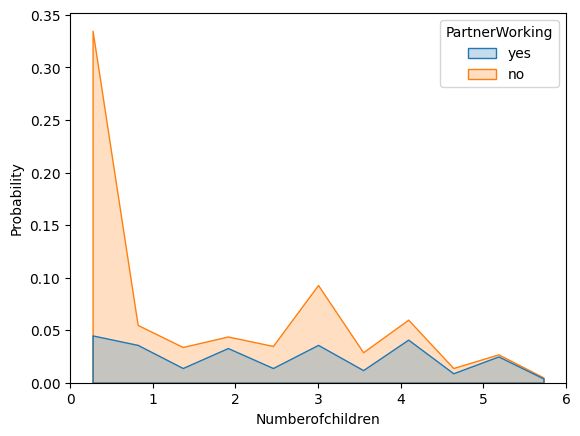

In [53]:
sns.histplot(df, x="Numberofchildren", hue="PartnerWorking", 
             element="poly", stat="probability")

<Axes: xlabel='Salary', ylabel='Probability'>

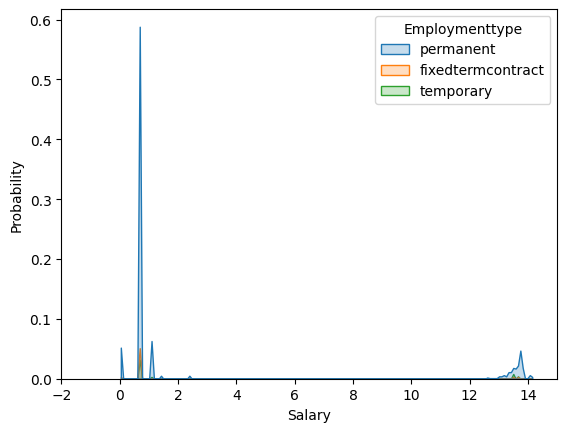

In [65]:
plt.xlim((-2, 15))
sns.histplot(x=np.log(df.Salary), hue=df.Employmenttype, 
             element="poly", stat="probability")

c:\Users\jako\Anaconda3\envs\jako_testar\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


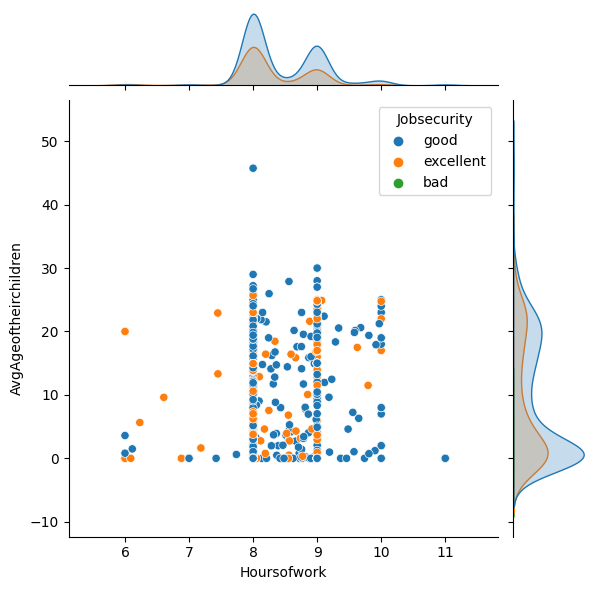

In [98]:
sns.jointplot(x=df[df.AvgAgeoftheirchildren < 60]["Hoursofwork"], y=df[df.AvgAgeoftheirchildren < 60].AvgAgeoftheirchildren, hue=df[df.AvgAgeoftheirchildren < 60].Jobsecurity)

In [123]:
df["ID_check"] = np.where((df.ID - round(df.ID, 3)) == 0, 1, 0)
df["ID"] = np.where(df.ID_check == 1, round(df.ID, 0), df.ID)

In [129]:
df[df.ID_check == 1]

,ID,Gender,Age,EducationBackground,Language,marriage,PartnerWorking,Numberofchildren,AvgAgeoftheirchildren,Resident,Jobtime,Hoursofwork,Salary,Yearsofservice,Socialassurance,Position,Department,Computerskills,Jobsecurity,Smoking,Transportation,Vacationdays,Nationality,Employmenttype,No.ofactivities,No.ofpenalties,TermReason,Riseinincomereceived,Employeedisciplined,Recommendationforpromotion,ID_check
0,5.0,m,34-41,master,2,married,yes,0.00000,0.000000,local,ft,8.0,2.0,1,yes,leademp,others,good,good,no,yes,4.0,iraqi,permanent,68.0,0.000000,none,yes,no,yes,1
1,266.0,f,50yearsabove,bachelor,2,married,no,4.00000,18.000000,local,ft,8.0,2.0,1,no,regularemp,marketing,good,excellent,no,yes,4.0,iraqi,permanent,3.0,0.000000,none,yes,yes,yes,1
2,103.0,m,50yearsabove,diploma,3,married,no,2.00000,20.000000,local,ft,9.0,2.0,2,no,supervisor,inventory,good,excellent,no,no,4.0,iraqi,permanent,2.0,0.000000,none,yes,yes,yes,1
3,15.0,m,26-33,bachelor,1,married,no,2.00000,2.000000,local,ft,9.0,2.0,3,no,supervisor,sales,good,good,yes,yes,4.0,iraqi,permanent,68.0,0.000000,none,yes,no,yes,1
4,282.0,m,42-49,bachelor,3,married,yes,3.00000,19.000000,local,ft,8.0,2.0,2,yes,leademp,IT,none,good,no,yes,2.0,iraqi,fixedtermcontract,2.0,0.000000,none,yes,yes,yes,1
5,304.0,m,26-33,diploma,2,single,no,0.00000,0.000000,local,ft,9.0,2.0,0,yes,supervisor,finishedgoodswarehouse,good,good,no,yes,1.0,iraqi,permanent,4.0,0.000000,none,no,yes,yes,1
6,12.0,m,26-33,undergraduate,3,married,no,0.00000,0.000000,local,ft,9.0,2.0,3,yes,supervisor,sales,good,good,yes,yes,4.0,iraqi,permanent,10.0,0.000000,none,yes,no,yes,1
7,296.0,f,18-25,bachelor,3,single,no,0.00000,0.000000,local,ft,9.0,2.0,2,yes,leademp,finishedgoodswarehouse,excellent,good,no,yes,2.0,iraqi,permanent,2.0,0.000000,none,no,yes,yes,1
8,36.0,m,42-49,bachelor,3,married,no,0.00000,0.000000,local,ft,8.0,3.0,2,yes,supervisor,humanresource,good,excellent,no,yes,4.0,iraqi,permanent,3.0,0.000000,none,yes,yes,yes,1
9,264.0,m,50yearsabove,diploma,1,married,yes,3.00000,23.000000,not-local,ft,8.0,2.0,1,no,regularemp,marketing,none,good,no,yes,4.0,iraqi,permanent,3.0,0.000000,none,yes,yes,yes,1


In [128]:
df[df.ID_check == 0]

,ID,Gender,Age,EducationBackground,Language,marriage,PartnerWorking,Numberofchildren,AvgAgeoftheirchildren,Resident,Jobtime,Hoursofwork,Salary,Yearsofservice,Socialassurance,Position,Department,Computerskills,Jobsecurity,Smoking,Transportation,Vacationdays,Nationality,Employmenttype,No.ofactivities,No.ofpenalties,TermReason,Riseinincomereceived,Employeedisciplined,Recommendationforpromotion,ID_check
364,189.447111,m,50yearsabove,diploma,1,married,yes,2.588697,23.695036,local,ft,9.0,2.0,1,yes,regularemp,others,good,good,no,yes,4.000000,iraqi,permanent,0.000000,0.000000,Pay,yes,no,no,0
365,82.169085,f,42-49,bachelor,2,married,no,1.880137,3.259900,local,ft,8.0,2.0,2,yes,regularemp,others,good,good,no,yes,4.000000,iraqi,permanent,50.778751,0.000000,AcceptedNewJob,yes,yes,no,0
366,202.641230,m,34-41,bachelor,1,married,no,4.000000,12.383198,local,ft,8.0,2.0,1,yes,regularemp,others,good,excellent,no,yes,1.000000,iraqi,permanent,0.000000,0.000000,Pay,no,no,no,0
367,127.512485,m,26-33,bachelor,1,single,no,0.000000,0.000000,local,ft,8.0,2.0,1,yes,leademp,others,good,good,no,yes,4.000000,iraqi,permanent,0.000000,4.437663,none,yes,yes,no,0
368,211.313617,m,42-49,bachelor,2,married,no,2.961896,17.689687,local,ft,8.0,2.0,1,yes,regularemp,others,good,good,no,yes,4.000000,iraqi,permanent,0.000000,0.000000,none,yes,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,184.269040,m,34-41,bachelor,1,married,no,3.854724,14.937997,local,ft,8.0,2.0,1,yes,regularemp,others,good,excellent,no,yes,1.390277,iraqi,permanent,0.000000,0.000000,Pay,no,no,no,0
996,49.543151,f,26-33,bachelor,1,married,no,1.686101,824.681873,local,ft,8.0,2.0,1,yes,regularemp,marketing,good,good,no,yes,2.956519,iraqi,permanent,145.480934,0.058062,none,yes,no,no,0
997,166.143387,m,50yearsabove,bachelor,2,married,no,4.541363,26.722949,local,ft,8.0,2.0,1,yes,regularemp,marketing,good,good,no,yes,3.577358,iraqi,permanent,0.000000,0.000000,Pay,yes,yes,no,0
998,117.293523,m,18-25,diploma,1,single,no,0.000000,0.000000,local,ft,9.0,2.0,1,yes,leademp,others,good,good,no,yes,4.000000,iraqi,permanent,0.000000,3.000000,none,no,yes,no,0


In [138]:
df[df.Salary > 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 44 to 860
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          196 non-null    float64
 1   Gender                      196 non-null    object 
 2   Age                         196 non-null    object 
 3   EducationBackground         196 non-null    object 
 4   Language                    196 non-null    object 
 5   marriage                    196 non-null    object 
 6   PartnerWorking              196 non-null    object 
 7   Numberofchildren            196 non-null    float64
 8   AvgAgeoftheirchildren       196 non-null    float64
 9   Resident                    196 non-null    object 
 10  Jobtime                     196 non-null    object 
 11  Hoursofwork                 196 non-null    float64
 12  Salary                      196 non-null    float64
 13  Yearsofservice              196 no

In [147]:
df_usable = df[(df.ID_check == 1)].copy()

In [165]:
df_usable.groupby(["Gender", "Position"]).describe()

ID                                                            Numberofchildren                                                AvgAgeoftheirchildren                                                            Hoursofwork                                               Vacationdays                                              No.ofactivities                                                             No.ofpenalties                                                   ID_check                                   
                   count        mean         std   min    25%    50%     75%    max            count      mean       std  min   25%  50%   75%  max                 count       mean         std  min  25%   50%    75%          max       count      mean       std  min  25%  50%  75%   max        count      mean       std  min  25%  50%  75%  max           count         mean           std  min   25%  50%    75%       max          count      mean       std  min  25%  50%  75%       max    count mean  std  min  25%  50%  75%  max
Gender Position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
f      leademp      25.0  219.800000   99.987916  40.0   95.0  296.0  296.00  331.0             25.0  0.440000  1.083205  0.0  0.00  0.0  0.00  4.0                  25.0   1.920000    5.073789  0.0  0.0   0.0   0.00    21.000000        25.0  8.480000  0.509902  8.0  8.0  8.0  9.0   9.0         25.0  2.360000  0.860233  1.0  2.0  2.0  2.0  4.0            25.0     3.680000      6.362128  0.0  2.00  2.0   3.00      33.0           25.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000     25.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
       manager      14.0  283.785714   95.624408  18.0  268.5  311.5  346.50  360.0             14.0  2.214286  2.082106  0.0  0.00  3.0  4.00  5.0                  14.0  11.928571   10.880217  0.0  0.0  18.0  20.00    25.000000        14.0  8.642857  0.841897  7.0  8.0  9.0  9.0  10.0         14.0  3.142857  1.027105  2.0  2.0  4.0  4.0  4.0            14.0     4.785714      3.445813  0.0  3.00  4.0   5.50      15.0           14.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000     14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
       regularemp   80.0  167.225000   98.807699   3.0   95.5  174.0  229.50  359.0             80.0  1.487500  1.735655  0.0  0.00  0.5  3.00  5.0                  80.0   7.150000    9.095972  0.0  0.0   0.0  17.00    28.000000        80.0  8.587500  0.774495  6.0  8.0  9.0  9.0  11.0         80.0  3.300000  1.140730  1.0  2.0  4.0  4.0  4.0            80.0     7.337500     11.665099  0.0  0.00  3.0  10.00      68.0           80.0  0.187500  0.730766  0.0  0.0  0.0  0.0  3.000000     80.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
       supervisor    8.0  252.250000   85.387771  70.0  244.5  261.0  311.25  333.0              8.0  1.625000  1.597990  0.0  0.75  1.5  2.00  5.0                   8.0   8.500000    8.280787  0.0  3.0   6.0  14.00    24.000000         8.0  8.500000  0.755929  8.0  8.0  8.0  9.0  10.0          8.0  3.250000  1.035098  2.0  2.0  4.0  4.0  4.0             8.0     4.500000      3.625308  0.0  2.75  4.0   4.75      12.0            8.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000      8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
m      leademp      75.0  167.640000   96.247519   1.0   88.0  204.0  234.00  362.0             75.0  1.746667  1.809086  0.0  0.00  2.0  3.00  5.0                  75.0   7.106667    7.634511  0.0  0.0   8.0  15.00    26.000000        75.0  8.440000  0.620375  7.0  8.0  8.0  9.0  10.0         75.0  3.306667  1

In [149]:
df_usable.drop(columns="Salary", inplace=True)

<Axes: xlabel='Gender', ylabel='Position'>

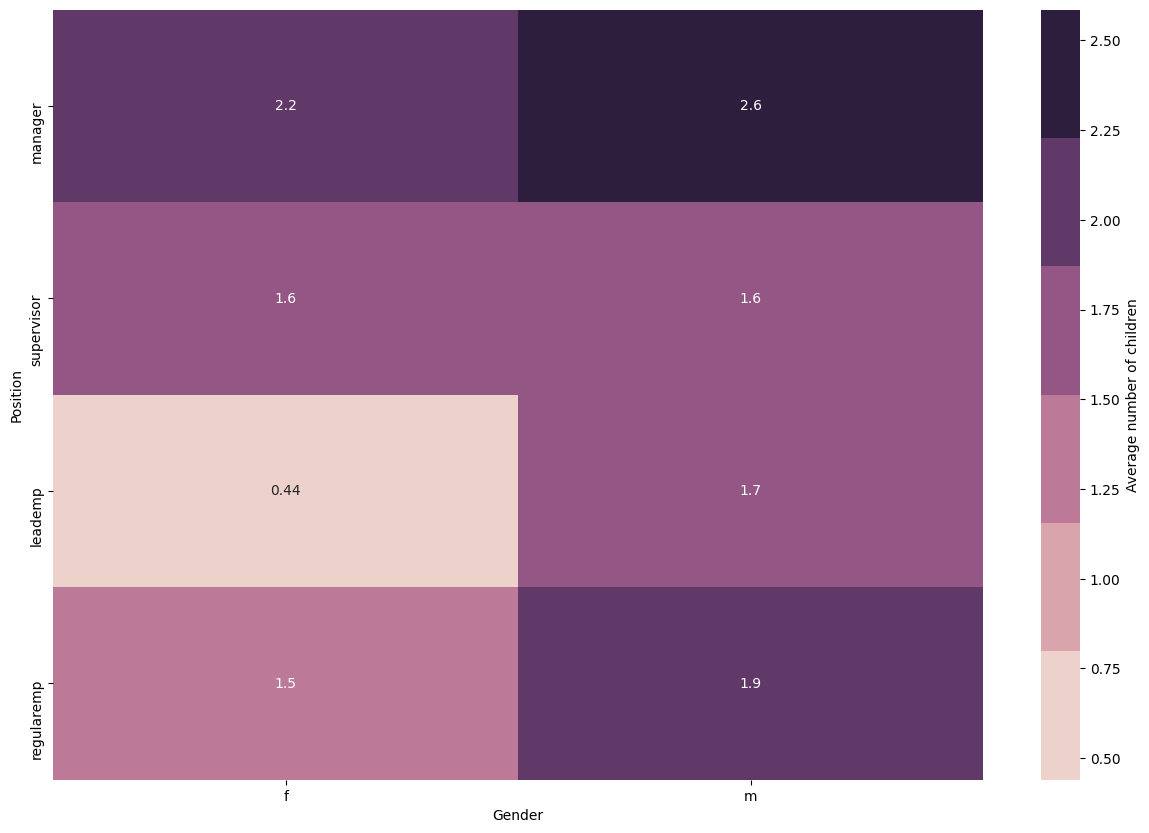

In [173]:
mat = df_usable.groupby(["Gender", "Position"])["Numberofchildren"].mean().reset_index().pivot_table(values="Numberofchildren", index="Position", columns="Gender")

mat = mat.reindex(["manager", "supervisor", "leademp", "regularemp"])
plt.figure(figsize=(15, 10))
sns.heatmap(mat, annot=True, cmap=sns.cubehelix_palette(), cbar_kws={"label":"Average number of children"})

C:\Users\jako\AppData\Local\Temp\ipykernel_35672\2621223757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_usable.corr()


<Axes: >

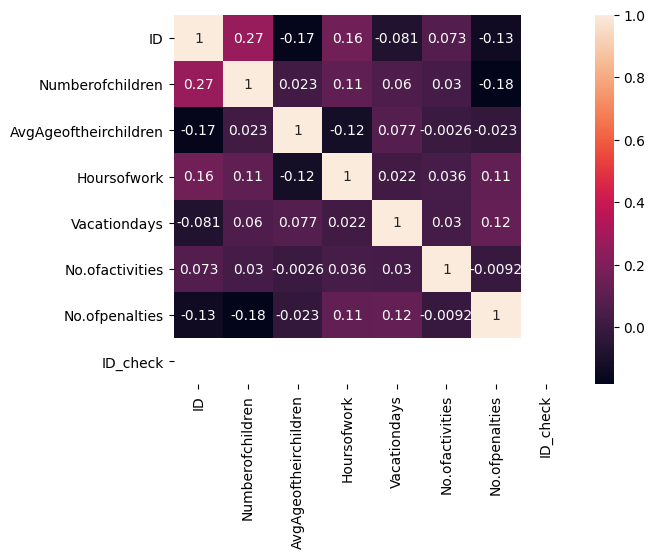

In [180]:
cormat = df_usable.corr()

sns.heatmap(cormat, annot=True)